Task 2

The MNIST handwritten digit recognition task was solved using both machine learning and deep learning approaches. Logistic Regression was used as a baseline model after flattening and normalizing image data. For improved performance, a Convolutional Neural Network (CNN) was implemented, which automatically learns spatial features from image pixels. The CNN achieved significantly higher accuracy, demonstrating the effectiveness of deep learning for image classification tasks.

Logistic Regression

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0


In [5]:
lr = LogisticRegression(max_iter=50)
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50)

In [6]:
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9215
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.91      0.90      0.90      1010
           4       0.93      0.92      0.93       982
           5       0.89      0.87      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [9]:
cm = confusion_matrix(y_test, y_pred)


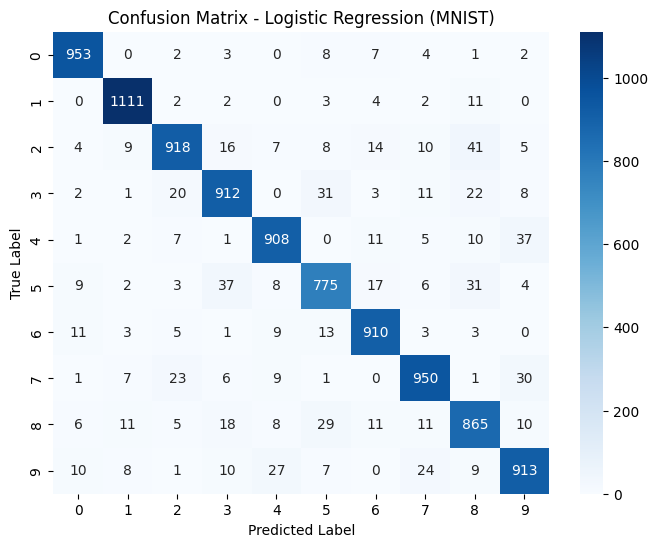

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (MNIST)")
plt.show()


In [25]:
# Select an image
image = X_test[7]

# Predict
prediction = lr.predict([image])

print("Predicted Digit:", prediction[0])


Predicted Digit: 9


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

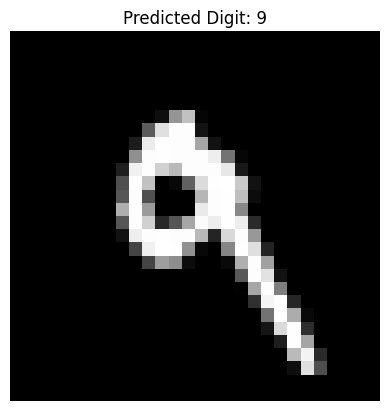

In [26]:
plt.imshow(image.reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {prediction[0]}")
plt.axis('off')


CNN

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


In [28]:
# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [29]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [31]:
history = model.fit(
    X_train,
    y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 179ms/step - accuracy: 0.2826 - loss: 1.9769 - val_accuracy: 0.8858 - val_loss: 0.4223
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 126ms/step - accuracy: 0.8026 - loss: 0.6277 - val_accuracy: 0.9223 - val_loss: 0.2708
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 121ms/step - accuracy: 0.8542 - loss: 0.4761 - val_accuracy: 0.9428 - val_loss: 0.2058
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 124ms/step - accuracy: 0.8849 - loss: 0.3821 - val_accuracy: 0.9553 - val_loss: 0.1593
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 117ms/step - accuracy: 0.8988 - loss: 0.3333 - val_accuracy: 0.9638 - val_loss: 0.1336
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 117ms/step - accuracy: 0.9121 - loss: 0.2915 - val_accuracy: 0.9675 - val_loss: 0.1199
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 122ms/step - accuracy: 0.9257 - loss: 0.2459 - val_accuracy: 0.9700 - val_loss: 0.1020
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 115ms/step - accuracy: 0.9292 - loss: 0

In [32]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("CNN Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9692 - loss: 0.1051
CNN Test Accuracy: 0.9729999899864197


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


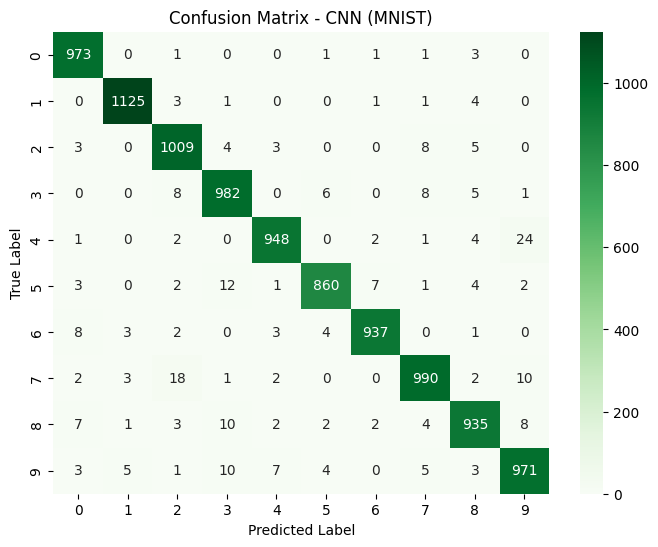

In [33]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN (MNIST)")
plt.show()


In [34]:
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

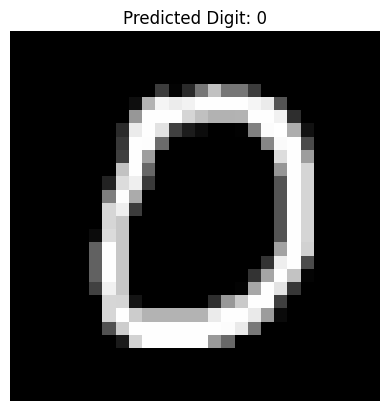

In [35]:
index = 10
image = X_test[index]

prediction = model.predict(image.reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)

plt.imshow(image.reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
